<h4 style="text-align: right;">ФБ-23 Качмар Михайло</h4>
<h1 style="text-align: center;"><b>Лабораторна робота №6</b></h1>
<h3 style="text-align: center;">Засоби підготовки та аналізу даних</h3>
<h5 style="text-aligleftter;"><b>Хід роботи:</b</h5>

<h1><b>ЗАВДАННЯ №1</b></h1>

In [1]:
import timeit
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Setup Complete")

Setup Complete


<h4>1. Згенеруйте двовимірні дані (x, y) за допомогою numpy.random : бажано, щоб розподіл точок був навколо деякої наперед заданої прямої (y = kx + b) для подальшого аналізу результатів.</h4>

In [2]:
tk = 3
tb = 6

np.random.seed(26)
x = np.random.uniform(-10, 10, size=1000)

np.random.seed(26)
noise = np.random.normal(0, 3, size=1000)
y = tk * x + tb + noise

<h4>2. Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних оцінок k^ та b^.</h4>
<h4>3. Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо такі є).</h4>

In [3]:
def least_squares(x, y):

    x_mean = np.mean(x)
    y_mean = np.mean(y)

    numer = np.sum((x - x_mean) * (y - y_mean))
    denom = np.sum((x - x_mean) ** 2)

    if denom == 0:
        raise ValueError("Неможливо обчислити коефіцієнт k^, оскільки x є константою.")
    
    k_hat = numer / denom  
    b_hat = y_mean - k_hat * x_mean

    return k_hat, b_hat

runs = 10000
time_least_squares = 0
time_pt = 0

for i in range(runs):
    start_time = timeit.default_timer()
    i, i = least_squares(x, y)
    end_time = timeit.default_timer()
    time_least_squares += end_time - start_time

    start_time = timeit.default_timer()
    i, i = np.polyfit(x, y, 1)
    end_time = timeit.default_timer()
    time_pt += end_time - start_time

avg_time_least_squares = time_least_squares / runs
avg_time_pt = time_pt / runs

k_hat, b_hat = least_squares(x, y)

k_pt, b_pt = np.polyfit(x, y, 1)

print(f"Початкові параметри: k = {tk}, b = {tb}")
print()

error_k_direct = abs((k_hat - tk) / tk) * 100
error_b_direct = abs((b_hat - tb) / tb) * 100
print("Прямий метод МНК:")
print(f"k^ = {k_hat} (відносна похибка: {error_k_direct}%)")
print(f"b^ = {b_hat} (відносна похибка: {error_b_direct}%)")
print(f"Середній час виконання: {avg_time_least_squares:.6f} секунд")
print()

error_k_pt = abs((k_pt - tk) / tk) * 100
error_b_pt = abs((b_pt - tb) / tb) * 100
print("Метод np.polyfit:")
print(f"k^ = {k_pt} (відносна похибка: {error_k_pt}%)")
print(f"b^ = {b_pt} (відносна похибка: {error_b_pt}%)")
print(f"Середній час виконання: {avg_time_pt:.6f} секунд") 

Початкові параметри: k = 3, b = 6

Прямий метод МНК:
k^ = 2.9994474086033147 (відносна похибка: 0.018419713222842894%)
b^ = 6.002991406566594 (відносна похибка: 0.049856776109905944%)
Середній час виконання: 0.000160 секунд

Метод np.polyfit:
k^ = 2.9994474086033156 (відносна похибка: 0.018419713222813293%)
b^ = 6.002991406566596 (відносна похибка: 0.04985677610993555%)
Середній час виконання: 0.000744 секунд


<h4>4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви генерували вхідні дані навколо лінії, відобразіть також її.
Також знайдемо похибки MSE, MAE та R^2</h4>

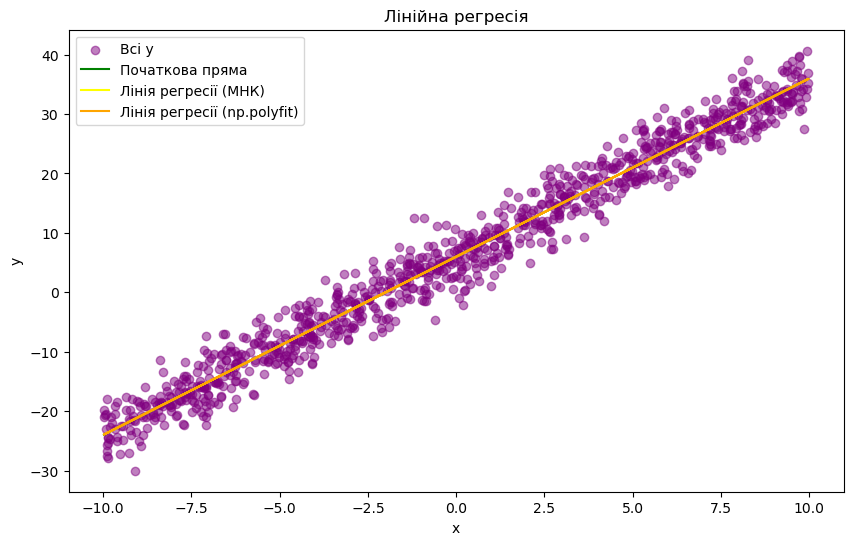


Похибки МНК:
MSE: 8.741300959758258
MAE: 2.341578554156707
R^2: 0.9712967333824971

Похибки np.polyfit:
MSE: 8.741300959758256
MAE: 2.341578554156707
R^2: 0.9712967333824971


In [4]:
plt.figure(figsize=(10, 6))

plt.scatter(x, y, label="Всі y", color="purple", alpha=0.5)

plt.plot(x, tk * x + tb, label="Початкова пряма", color="green")
plt.plot(x, k_hat * x + b_hat, label="Лінія регресії (МНК)", color="yellow")
plt.plot(x, k_pt * x + b_pt, label="Лінія регресії (np.polyfit)", color="orange")

plt.title("Лінійна регресія")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

y_pred_mnk = k_hat * x + b_hat
mse_mnk = mean_squared_error(y, y_pred_mnk)
mae_mnk = mean_absolute_error(y, y_pred_mnk)
r2_mnk = r2_score(y, y_pred_mnk)

print(f"\nПохибки МНК:")
print(f"MSE: {mse_mnk}")
print(f"MAE: {mae_mnk}")
print(f"R^2: {r2_mnk}")

y_pred_pt = k_pt * x + b_pt
mse_pt = mean_squared_error(y, y_pred_pt)
mae_pt = mean_absolute_error(y, y_pred_pt)
r2_pt = r2_score(y, y_pred_pt)

print(f"\nПохибки np.polyfit:")
print(f"MSE: {mse_pt}")
print(f"MAE: {mae_pt}")
print(f"R^2: {r2_pt}")

<h1><b>ЗАВДАННЯ №2</b></h1>

<h4>1. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних оцінок k^ та b^ (над k та b в завданні позначено ^).  Визначіть оптимальні вхідні параметри: learning_rate, n_iter.</h4>

In [5]:
def gradient_descent(x, y, learning_rate=0.01, n_iter=1000, initial_params=None):

    if len(x) == 0 or len(y) == 0:
        return None, None, None, None, None
    
    if initial_params is None:
        k_hat = 0
        b_hat = 0
    else:
        k_hat, b_hat = initial_params

    mse_hry = []
    mae_hry = []
    r2_hry = []

    for i in range(n_iter):
        y_pred = k_hat * x + b_hat
        errors = y - y_pred

        dk = -2 * np.mean(x * errors)
        db = -2 * np.mean(errors)

        k_hat = k_hat - learning_rate * dk
        b_hat = b_hat - learning_rate * db

        mse = mean_squared_error(y, y_pred)
        mae = mean_absolute_error(y, y_pred)
        r2 = r2_score(y, y_pred)

        mse_hry.append(mse)
        mae_hry.append(mae)
        r2_hry.append(r2)

    return k_hat, b_hat, mse_hry, mae_hry, r2_hry

<h4>2. Додайте отриману лінію регресії на загальний графік.</h4>

Метод градієнтного спуску:
k^ = 2.9994474086456764 (відносна похибка: 0.02%)
b^ = 6.00299139436638 (відносна похибка: 0.05%)
Середній час виконання: 16.391906 секунд

Похибки градієнтного спуску: 
MSE: 8.741300959758258
MAE: 2.3415785541088145
R^2: 0.9712967333824971


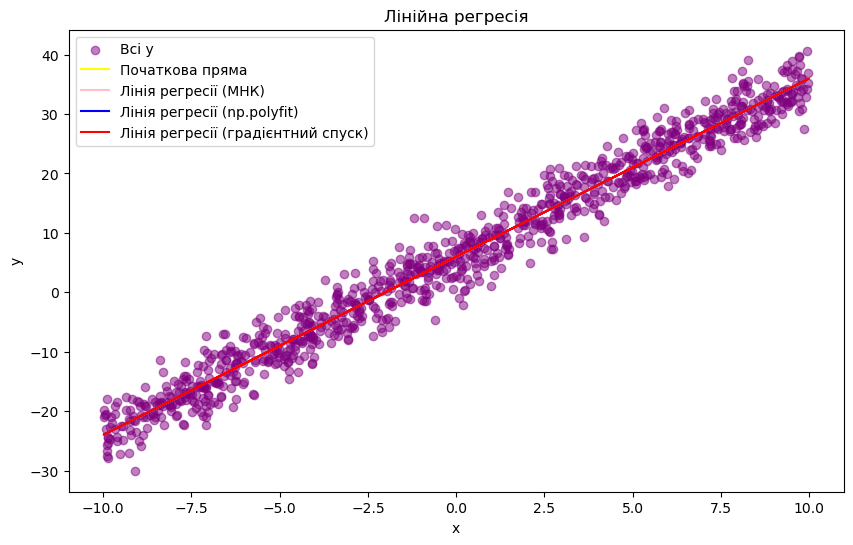

In [6]:
learning_rate = 0.001
n_iter = 10000

runs = 3
time_gradient_descent = 0

for i in range(runs):
    start_time = timeit.default_timer()
    i, i, i, i, i = gradient_descent(x, y, learning_rate, n_iter)
    end_time = timeit.default_timer()
    time_gradient_descent += end_time - start_time

avg_time_gradient_descent = time_gradient_descent / runs

k_hat_gd, b_hat_gd, mse_hry, mae_hry, r2_hry = gradient_descent(x, y, learning_rate, n_iter)

error_k_gd = abs((k_hat_gd - tk) / tk) * 100
error_b_gd = abs((b_hat_gd - tb) / tb) * 100
print("Метод градієнтного спуску:")
print(f"k^ = {k_hat_gd} (відносна похибка: {error_k_gd:.2f}%)")
print(f"b^ = {b_hat_gd} (відносна похибка: {error_b_gd:.2f}%)")
print(f"Середній час виконання: {avg_time_gradient_descent:.6f} секунд")


y_pred_gd = k_hat_gd * x + b_hat_gd

mse_gd = mse_hry[-1]
mae_gd = mae_hry[-1]
r2_gd = r2_hry[-1]

print(f"\nПохибки градієнтного спуску: ")
print(f"MSE: {mse_gd}")
print(f"MAE: {mae_gd}")
print(f"R^2: {r2_gd}")

plt.figure(figsize=(10, 6))

plt.scatter(x, y, label="Всі y", color="purple", alpha=0.5)

plt.plot(x, tk * x + tb, label="Початкова пряма", color="yellow")
plt.plot(x, k_hat * x + b_hat, label="Лінія регресії (МНК)", color="pink")
plt.plot(x, k_pt * x + b_pt, label="Лінія регресії (np.polyfit)", color="blue")
plt.plot(x, k_hat_gd * x + b_hat_gd, label="Лінія регресії (градієнтний спуск)", color="red")

plt.title("Лінійна регресія")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

<h4>3. Побудуйте графік похибки від кількості ітерацій, зробіть висновки.</h4>

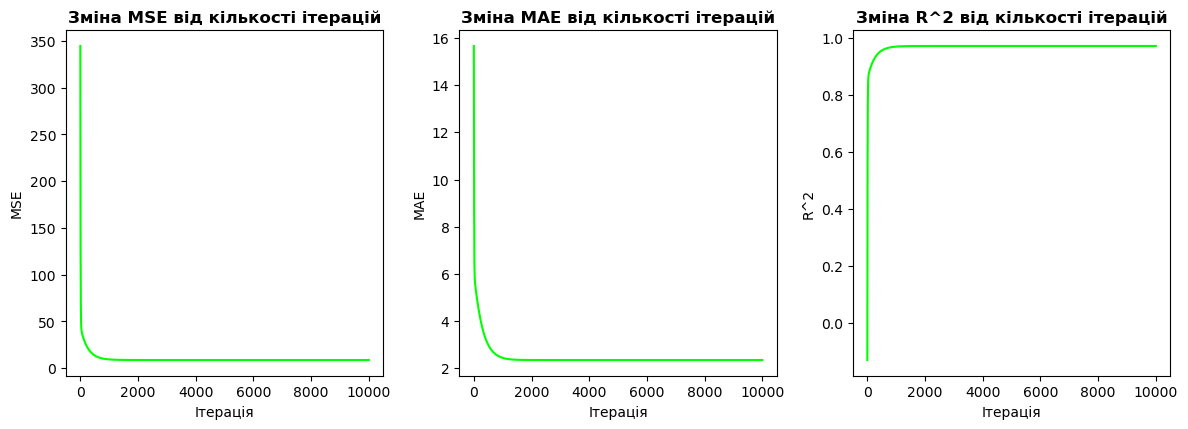

In [7]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot(range(n_iter), mse_hry, color="lime")
plt.title("Зміна MSE від кількості ітерацій", fontweight='bold')
plt.xlabel("Ітерація")
plt.ylabel("MSE")

plt.subplot(2, 3, 2)
plt.plot(range(n_iter), mae_hry, color="lime")
plt.title("Зміна MAE від кількості ітерацій", fontweight='bold')
plt.xlabel("Ітерація")
plt.ylabel("MAE")

plt.subplot(2, 3, 3)
plt.plot(range(n_iter), r2_hry, color="lime")
plt.title("Зміна R^2 від кількості ітерацій", fontweight='bold')
plt.xlabel("Ітерація")
plt.ylabel("R^2")


plt.tight_layout()
plt.show()

<h4>4. Порівняйте отримані результати з результатами попереднього завдання. Зробив також перехресну перевірку.<h4>

In [11]:
kf = KFold(n_splits=10, shuffle=True, random_state=33)

mse_scores = cross_val_score(LinearRegression(), x.reshape(-1, 1), y, scoring='neg_mean_squared_error', cv=kf)
mae_scores = cross_val_score(LinearRegression(), x.reshape(-1, 1), y, scoring='neg_mean_absolute_error', cv=kf)
r2_scores = cross_val_score(LinearRegression(), x.reshape(-1, 1), y, scoring='r2', cv=kf)

mean_mse = -np.mean(mse_scores)
mean_mae = -np.mean(mae_scores)
mean_r2 = np.mean(r2_scores)

table_data = [
    ["Початкові параметри", f"{tk}", "-", f"{tb}", "-", "-"],
    ["Обчислення через МНК", f"{k_hat}", f"{error_k_direct}%", f"{b_hat}", 
     f"{error_b_direct}%", f"{avg_time_least_squares:.6f}"],
    ["Обчислення через np.polyfit", f"{k_pt}", f"{error_k_pt}%", f"{b_pt}", 
     f"{error_b_pt}%", f"{avg_time_pt:.6f}"],
    ["Обчислення через градієнтний спуск", f"{k_hat_gd}", f"{error_k_gd}%", f"{b_hat_gd}", 
     f"{error_b_gd}%", f"{avg_time_gradient_descent:.6f}"]
]

def custom_tabulate(table_data, headers):
    table = []
    col_widths = [max(len(str(item)) for item in col) + 2 for col in zip(*table_data, headers)]
    
    table.append("╔" + "╦".join("═" * width for width in col_widths) + "╗")
    table.append("║ " + " ║ ".join(header.center(width - 2) for header, width in zip(headers, col_widths)) + " ║")
    table.append("╠" + "╬".join("═" * width for width in col_widths) + "╣")
    
    for row in table_data:
        table.append("║ " + " ║ ".join(str(item).center(width - 2) for item, width in zip(row, col_widths)) + " ║")
    
    table.append("╚" + "╩".join("═" * width for width in col_widths) + "╝")
    
    return "\n".join(table)

headers = ["Метод", "k", "k (відносна похибка)", "b", "b (відносна похибка)", "Середній час виконання (с)"]
print("Початкові параметри та обчислені значення:")
print(custom_tabulate(table_data, headers))
print("\n")

error_table = [
    ["Похибки МНК", f"{mse_mnk}", f"{mae_mnk}", f"{r2_mnk}"],
    ["Похибки np.polyfit", f"{mse_pt}", f"{mae_pt}", f"{r2_pt}"],
    ["Похибки градієнтного спуску", f"{mse_gd}", f"{mae_gd}", f"{r2_gd}"],
    ["Перехресна перевірка", f"{mean_mse}", f"{mean_mae}", f"{mean_r2}"]
]

headers = ["Метод", "MSE", "MAE", "R^2"]
print("Похибки різних методів:")
print(custom_tabulate(error_table, headers))
print("\n")

Початкові параметри та обчислені значення:
╔════════════════════════════════════╦════════════════════╦═══════════════════════╦═══════════════════╦═══════════════════════╦════════════════════════════╗
║               Метод                ║         k          ║  k (відносна похибка) ║         b         ║  b (відносна похибка) ║ Середній час виконання (с) ║
╠════════════════════════════════════╬════════════════════╬═══════════════════════╬═══════════════════╬═══════════════════════╬════════════════════════════╣
║        Початкові параметри         ║         3          ║           -           ║         6         ║           -           ║             -              ║
║        Обчислення через МНК        ║ 2.9994474086033147 ║ 0.018419713222842894% ║ 6.002991406566594 ║ 0.049856776109905944% ║          0.000160          ║
║    Обчислення через np.polyfit     ║ 2.9994474086033156 ║ 0.018419713222813293% ║ 6.002991406566596 ║  0.04985677610993555% ║          0.000744          ║
║ Обчислення че